In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
%matplotlib inline

In [9]:
train_meta = pd.read_csv('train/train_metadata.csv')
train_meta.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5488 non-null   int64 
 1   image_path  5488 non-null   object
 2   ClassId     5488 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 128.8+ KB


In [10]:
train_meta.head()


,id,image_path,ClassId
0,7218,img_000001.jpg,32
1,6333,img_000002.jpg,13
2,6867,img_000003.jpg,7
3,7730,img_000004.jpg,4
4,6338,img_000005.jpg,35


In [11]:
train_meta['image_id'] = train_meta['image_path'].str.slice(start=4, stop=10)
train_meta.head()


,id,image_path,ClassId,image_id
0,7218,img_000001.jpg,32,000001
1,6333,img_000002.jpg,13,000002
2,6867,img_000003.jpg,7,000003
3,7730,img_000004.jpg,4,000004
4,6338,img_000005.jpg,35,000005


### spliting data into training and development

In [12]:
from sklearn.model_selection import train_test_split

train_idx, dev_idx, train_label, dev_label = train_test_split(
    train_meta['image_id'],
    train_meta['ClassId'],
    test_size=0.2,
    random_state=42
)


In [13]:
train_idx.shape, dev_idx.shape, train_label.shape, dev_label.shape


((4390,), (1098,), (4390,), (1098,))

<Axes: xlabel='ClassId'>

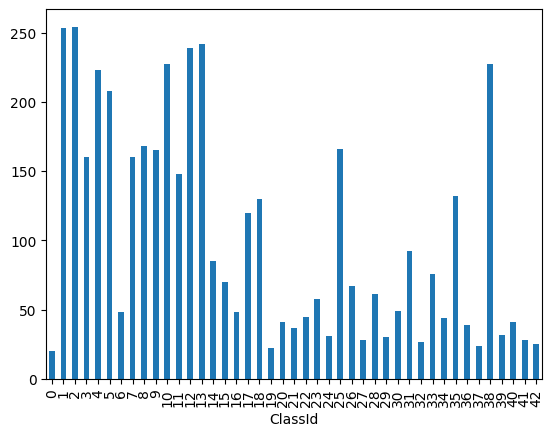

In [14]:
train_label.value_counts(normalize=False).sort_index().plot.bar()


<Axes: xlabel='ClassId'>

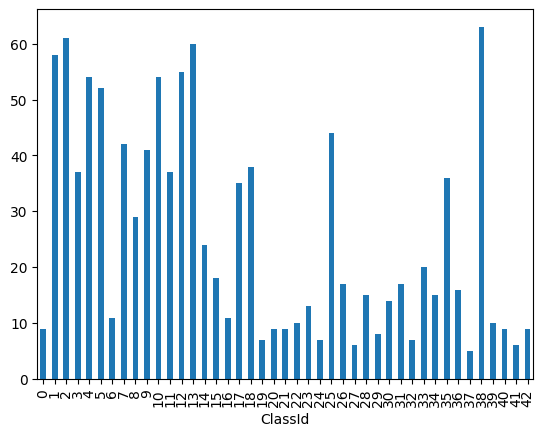

In [15]:
dev_label.value_counts(normalize=False).sort_index().plot.bar()

### existing features

In [16]:
ch_all = pd.read_csv('train/Features/color_histogram.csv')
ch_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_path  5488 non-null   object 
 1   ch_0        5488 non-null   float64
 2   ch_1        5488 non-null   float64
 3   ch_2        5488 non-null   float64
 4   ch_3        5488 non-null   float64
 5   ch_4        5488 non-null   float64
 6   ch_5        5488 non-null   float64
 7   ch_6        5488 non-null   float64
 8   ch_7        5488 non-null   float64
 9   ch_8        5488 non-null   float64
 10  ch_9        5488 non-null   float64
 11  ch_10       5488 non-null   float64
 12  ch_11       5488 non-null   float64
 13  ch_12       5488 non-null   float64
 14  ch_13       5488 non-null   float64
 15  ch_14       5488 non-null   float64
 16  ch_15       5488 non-null   float64
 17  ch_16       5488 non-null   float64
 18  ch_17       5488 non-null   float64
 19  ch_18       5488 non-null  

In [17]:
ch_all.head()


,image_path,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,...,ch_86,ch_87,ch_88,ch_89,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95
0,img_000001.jpg,0.000000,0.000000,0.268901,0.355617,0.511548,0.264923,0.526664,0.321408,0.097059,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,img_000002.jpg,0.000000,0.002267,0.657901,0.641467,0.222700,0.243100,0.108233,0.036833,0.021533,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,img_000003.jpg,0.002243,0.143541,0.385766,0.091956,0.066163,0.204097,0.353245,0.218676,0.222040,...,0.062342,0.056108,0.049874,0.043639,0.061303,0.072732,0.082084,0.110137,0.156894,0.670176
3,img_000004.jpg,0.000000,0.096069,0.947646,0.217350,0.160404,0.083028,0.042601,0.045209,0.040427,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,img_000005.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.015324,0.029918,0.024810,0.097779,...,0.013489,0.023231,0.016487,0.008243,0.025479,0.023981,0.011241,0.006745,0.006745,0.014988


In [18]:
ch_all.describe()


,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,...,ch_86,ch_87,ch_88,ch_89,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95
count,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,...,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000
mean,0.001594,0.091166,0.233191,0.261800,0.248081,0.219207,0.185793,0.155622,0.131744,0.115377,...,0.037646,0.033805,0.031102,0.029439,0.028065,0.027486,0.027551,0.029024,0.033417,0.176748
std,0.017190,0.222423,0.300232,0.257555,0.222946,0.193436,0.169253,0.146814,0.130340,0.120361,...,0.064813,0.057518,0.054890,0.055406,0.051261,0.051251,0.052588,0.052812,0.059633,0.301558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000701,0.030304,0.074960,0.072523,0.060665,0.049787,0.039599,0.031958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000681,0.060961,0.190260,0.186151,0.166587,0.138320,0.114759,0.094699,0.079347,...,0.010410,0.007942,0.005333,0.003435,0.001729,0.000684,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.027122,0.405630,0.423200,0.366910,0.319094,0.263843,0.217700,0.184177,0.162788,...,0.048510,0.044968,0.040943,0.038515,0.037046,0.037093,0.036337,0.038927,0.043190,0.226943
max,0.630910,0.993316,0.993788,0.995194,0.983005,0.987518,0.964943,0.948163,0.901505,0.933286,...,0.833016,0.655329,0.576796,0.853763,0.692838,0.680434,0.855979,0.670786,0.592011,0.998864


<Axes: >

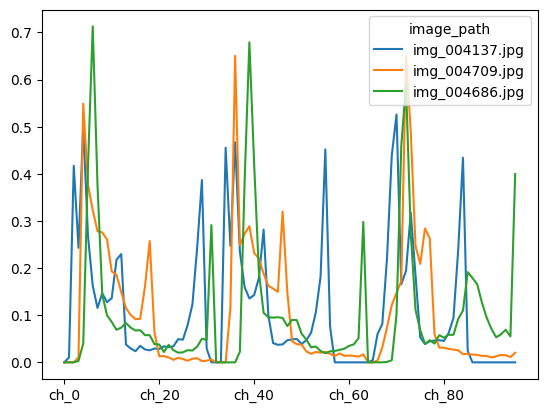

In [19]:
ch_all.sample(3).set_index('image_path').T.plot()


In [20]:
# 提取 image_id
ch_all['image_id'] = ch_all['image_path'].str.slice(start=4, stop=10)

# 分成训练集和验证集
train_ch = ch_all.drop(columns=['image_path']).loc[ch_all['image_id'].isin(train_idx)]
dev_ch = ch_all.drop(columns=['image_path']).loc[ch_all['image_id'].isin(dev_idx)]

# 查看维度
train_ch.shape, dev_ch.shape


((4390, 97), (1098, 97))

### hog_pca

In [21]:
# 读取 HOG + PCA 特征
hog_all = pd.read_csv('train/Features/hog_pca.csv')
hog_all.info()
hog_all.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_path  5488 non-null   object 
 1   hog_pca_0   5488 non-null   float64
 2   hog_pca_1   5488 non-null   float64
 3   hog_pca_2   5488 non-null   float64
 4   hog_pca_3   5488 non-null   float64
 5   hog_pca_4   5488 non-null   float64
 6   hog_pca_5   5488 non-null   float64
 7   hog_pca_6   5488 non-null   float64
 8   hog_pca_7   5488 non-null   float64
 9   hog_pca_8   5488 non-null   float64
 10  hog_pca_9   5488 non-null   float64
 11  hog_pca_10  5488 non-null   float64
 12  hog_pca_11  5488 non-null   float64
 13  hog_pca_12  5488 non-null   float64
 14  hog_pca_13  5488 non-null   float64
 15  hog_pca_14  5488 non-null   float64
 16  hog_pca_15  5488 non-null   float64
 17  hog_pca_16  5488 non-null   float64
 18  hog_pca_17  5488 non-null   float64
 19  hog_pca_18  5488 non-null  

,image_path,hog_pca_0,hog_pca_1,hog_pca_2,hog_pca_3,hog_pca_4,hog_pca_5,hog_pca_6,hog_pca_7,hog_pca_8,...,hog_pca_10,hog_pca_11,hog_pca_12,hog_pca_13,hog_pca_14,hog_pca_15,hog_pca_16,hog_pca_17,hog_pca_18,hog_pca_19
0,img_000001.jpg,-0.763458,0.927880,0.264329,-0.638673,0.831455,-0.527469,-0.959387,-0.538355,1.262615,...,-0.439643,-1.485862,-0.892584,-0.455376,-0.979620,0.450825,-0.213796,-0.882416,-0.309656,0.271686
1,img_000002.jpg,1.049284,3.608200,-1.817190,0.904380,-0.282195,0.623239,-0.510430,-0.388628,-0.457727,...,-0.190342,0.210740,-0.011180,0.138000,0.101737,-0.335682,-0.886182,0.507969,0.006536,0.471807
2,img_000003.jpg,-1.552440,-0.432374,-0.318422,0.671877,-0.381869,-0.224374,0.565182,0.267907,0.144193,...,0.521769,0.328718,-0.357041,-0.192591,0.377116,0.501386,-0.421448,0.081289,0.730258,-0.205895
3,img_000004.jpg,-1.556871,0.214406,0.973758,0.613876,-0.657341,0.007032,0.140899,-0.159095,-0.187679,...,0.948256,-0.115478,0.146324,-0.296778,-0.595600,0.285638,-0.481589,-0.101580,-0.139084,0.586276
4,img_000005.jpg,-0.944294,-0.334833,0.415215,-0.607014,-1.004900,0.172754,-0.692467,-0.193404,1.385177,...,1.007779,-0.219087,0.420509,-0.053858,0.601939,-0.520063,0.062209,0.248771,0.140214,0.292198


In [22]:
# 设置索引为 image_path（可能用于后续匹配）
hog_pca = hog_all.set_index('image_path')


In [23]:
hog_all.set_index('image_path').describe().round(3)


,hog_pca_0,hog_pca_1,hog_pca_2,hog_pca_3,hog_pca_4,hog_pca_5,hog_pca_6,hog_pca_7,hog_pca_8,hog_pca_9,hog_pca_10,hog_pca_11,hog_pca_12,hog_pca_13,hog_pca_14,hog_pca_15,hog_pca_16,hog_pca_17,hog_pca_18,hog_pca_19
count,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000,5488.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.793,1.103,0.942,0.735,0.660,0.611,0.604,0.534,0.531,0.519,0.465,0.436,0.431,0.419,0.417,0.409,0.400,0.386,0.382,0.375
min,-3.003,-2.036,-2.899,-2.612,-2.547,-2.807,-2.589,-1.536,-1.453,-1.994,-1.743,-1.945,-1.976,-1.749,-1.516,-1.582,-1.192,-1.501,-1.353,-1.977
25%,-1.414,-0.779,-0.524,-0.363,-0.414,-0.348,-0.381,-0.353,-0.368,-0.323,-0.302,-0.244,-0.261,-0.273,-0.277,-0.274,-0.278,-0.252,-0.255,-0.231
50%,-0.514,-0.217,0.076,0.140,-0.016,-0.006,0.049,-0.049,-0.055,-0.008,0.000,0.022,0.016,0.005,-0.005,-0.013,-0.033,0.005,-0.010,-0.001
75%,1.096,0.532,0.658,0.529,0.411,0.368,0.420,0.274,0.303,0.341,0.303,0.279,0.270,0.291,0.272,0.259,0.240,0.257,0.239,0.235
max,3.717,3.969,2.211,1.597,2.785,2.328,1.656,2.235,2.275,1.665,1.603,1.479,1.585,1.850,1.539,1.996,1.601,1.579,1.810,1.385


<Axes: >

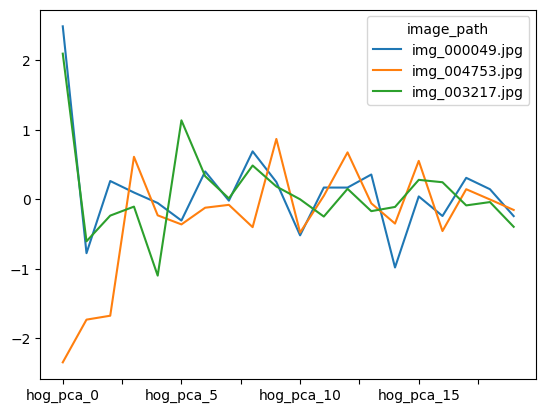

In [24]:
hog_all.sample(3).set_index('image_path').T.plot()


In [25]:
hog_all['image_id'] = hog_all['image_path'].str.slice(start=4, stop=10)

train_hog = hog_all.drop(columns=['image_path']).loc[hog_all['image_id'].isin(train_idx)]
dev_hog = hog_all.drop(columns=['image_path']).loc[hog_all['image_id'].isin(dev_idx)]

train_hog.shape, dev_hog.shape


((4390, 21), (1098, 21))

### additional features

In [26]:
additional_all = pd.read_csv(r'train/Features/additional_features.csv')
additional_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_path    5488 non-null   object 
 1   edge_density  5488 non-null   float64
 2   mean_b        5488 non-null   float64
 3   mean_g        5488 non-null   float64
 4   mean_r        5488 non-null   float64
dtypes: float64(4), object(1)
memory usage: 214.5+ KB


In [27]:
additional_all.head()


,image_path,edge_density,mean_b,mean_g,mean_r
0,img_000001.jpg,0.050293,63.748291,62.107910,62.850830
1,img_000002.jpg,0.034424,48.680664,52.872314,61.539307
2,img_000003.jpg,0.126709,99.174561,110.774658,127.348389
3,img_000004.jpg,0.026123,30.493896,26.616211,29.006592
4,img_000005.jpg,0.106934,116.836670,97.684814,79.495605


In [28]:
additional_all.describe()

,edge_density,mean_b,mean_g,mean_r
count,5488.000000,5488.000000,5488.000000,5488.000000
mean,0.091678,82.192781,80.003171,87.452502
std,0.072312,47.171930,47.214124,51.082152
min,0.000000,9.413818,7.042725,8.326660
25%,0.026611,44.187073,42.009399,46.136902
50%,0.084961,73.654541,72.266724,80.216187
75%,0.144348,112.702942,111.279907,120.723755
max,0.317383,250.570068,244.010010,251.132568


array([[<Axes: title={'center': 'edge_density'}>,
        <Axes: title={'center': 'mean_b'}>],
       [<Axes: title={'center': 'mean_g'}>,
        <Axes: title={'center': 'mean_r'}>]], dtype=object)

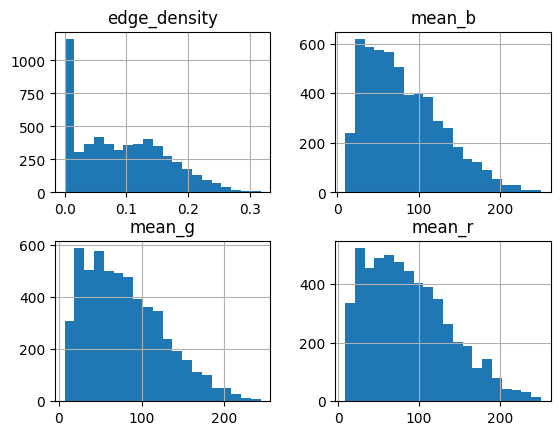

In [29]:
additional_all.hist(bins=20)

In [30]:
additional_all['image_id'] = additional_all['image_path'].str.slice(start=4, stop=10)

train_additional = additional_all.drop(columns=['image_path']).loc[additional_all['image_id'].isin(train_idx)]
dev_additional = additional_all.drop(columns=['image_path']).loc[additional_all['image_id'].isin(dev_idx)]

train_additional.shape, dev_additional.shape


((4390, 5), (1098, 5))

### Combine features

In [31]:
train_data = train_idx.to_frame().merge(
    train_additional, on=['image_id']
).merge(
    train_ch, on=['image_id']
).merge(
    train_hog, on=['image_id']
).set_index('image_id').sort_index()


In [32]:
dev_data = dev_idx.to_frame().merge(
    dev_additional, on=['image_id']
).merge(
    dev_ch, on=['image_id']
).merge(
    dev_hog, on=['image_id']
).set_index('image_id').sort_index()


In [33]:
train_data.shape, dev_data.shape


((4390, 120), (1098, 120))

In [34]:
y_train = train_label.set_axis(train_idx).sort_index()
y_dev = dev_label.set_axis(dev_idx).sort_index()

In [35]:
train_data.head(10)


,edge_density,mean_b,mean_g,mean_r,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,...,hog_pca_10,hog_pca_11,hog_pca_12,hog_pca_13,hog_pca_14,hog_pca_15,hog_pca_16,hog_pca_17,hog_pca_18,hog_pca_19
image_id,,,,,,,,,,,,,,,,,,,,,
000001,0.050293,63.748291,62.107910,62.850830,0.000000,0.000000,0.268901,0.355617,0.511548,0.264923,...,-0.439643,-1.485862,-0.892584,-0.455376,-0.979620,0.450825,-0.213796,-0.882416,-0.309656,0.271686
000002,0.034424,48.680664,52.872314,61.539307,0.000000,0.002267,0.657901,0.641467,0.222700,0.243100,...,-0.190342,0.210740,-0.011180,0.138000,0.101737,-0.335682,-0.886182,0.507969,0.006536,0.471807
000003,0.126709,99.174561,110.774658,127.348389,0.002243,0.143541,0.385766,0.091956,0.066163,0.204097,...,0.521769,0.328718,-0.357041,-0.192591,0.377116,0.501386,-0.421448,0.081289,0.730258,-0.205895
000004,0.026123,30.493896,26.616211,29.006592,0.000000,0.096069,0.947646,0.217350,0.160404,0.083028,...,0.948256,-0.115478,0.146324,-0.296778,-0.595600,0.285638,-0.481589,-0.101580,-0.139084,0.586276
000005,0.106934,116.836670,97.684814,79.495605,0.000000,0.000000,0.000000,0.000000,0.000000,0.015324,...,1.007779,-0.219087,0.420509,-0.053858,0.601939,-0.520063,0.062209,0.248771,0.140214,0.292198
000006,0.084961,99.917236,98.739990,140.281006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.039566,-0.050162,0.650980,-0.132330,-0.212765,0.124728,-0.364337,-0.147969,0.019411,0.539966
000007,0.086914,52.548340,58.419189,66.893555,0.000000,0.000559,0.001118,0.070405,0.762162,0.524685,...,-0.260462,0.127739,0.484427,-0.553062,-0.586104,0.333269,-0.215907,0.463761,-0.174727,0.496932
000008,0.225830,140.649414,139.717773,158.593262,0.000000,0.000000,0.000000,0.009919,0.552472,0.108114,...,0.347090,-0.893975,0.413606,0.299436,-0.152398,0.235977,0.913241,-0.232438,1.149338,-0.476716
000010,0.024902,56.420654,55.166016,60.178955,0.000000,0.000000,0.000000,0.401045,0.753341,0.321096,...,-0.012015,-0.003313,0.499054,-0.373557,-0.486253,-0.329720,-0.125174,0.352777,0.635303,-0.184648


In [36]:
y_train.head(10)

image_id
000001    32
000002    13
000003     7
000004     4
000005    35
000006    17
000007    23
000008    14
000010     2
000011    18
Name: ClassId, dtype: int64

### visualizing training data

In [37]:
train_data.groupby(y_train)['edge_density'].describe()


,count,mean,std,min,25%,50%,75%,max
ClassId,,,,,,,,
0,20.0,0.172192,0.036581,0.103516,0.149048,0.170654,0.197205,0.242920
1,253.0,0.139466,0.065330,0.000000,0.091797,0.152588,0.190918,0.282227
2,254.0,0.130994,0.078776,0.000000,0.071533,0.130249,0.191101,0.306641
3,160.0,0.064861,0.058268,0.000000,0.015747,0.053467,0.091187,0.224121
4,223.0,0.082199,0.073665,0.000000,0.010254,0.070068,0.133667,0.306885
5,208.0,0.054831,0.058799,0.000000,0.000000,0.035889,0.092834,0.229492
6,48.0,0.019430,0.033743,0.000000,0.000000,0.000000,0.023743,0.133057
7,160.0,0.062389,0.056137,0.000000,0.005737,0.045532,0.116150,0.175781
8,168.0,0.042690,0.057023,0.000000,0.000000,0.012939,0.070923,0.226074


<Axes: xlabel='ClassId'>

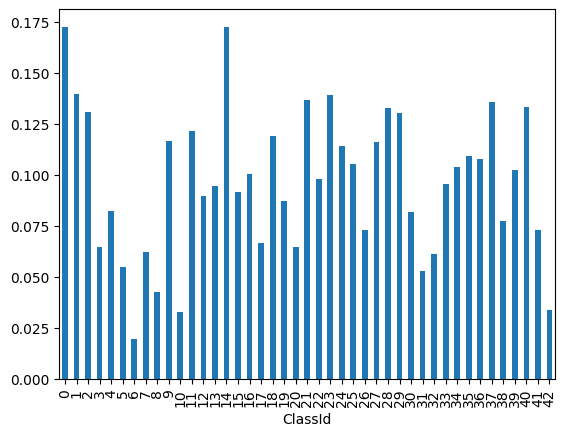

In [38]:
train_data.groupby(y_train)['edge_density'].mean().plot.bar()


In [39]:
y_dev.loc[y_dev == 6]


image_id
000480    6
000671    6
000764    6
001472    6
003012    6
003461    6
004334    6
004579    6
004775    6
004859    6
004999    6
Name: ClassId, dtype: int64

<Axes: xlabel='hog_pca_0', ylabel='hog_pca_1'>

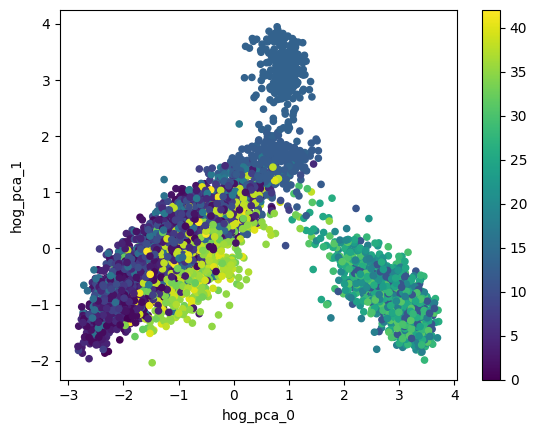

In [40]:
train_data.plot.scatter(
    x='hog_pca_0', y='hog_pca_1',
    c=y_train, cmap='viridis'
)


<Axes: xlabel='mean_r', ylabel='mean_g'>

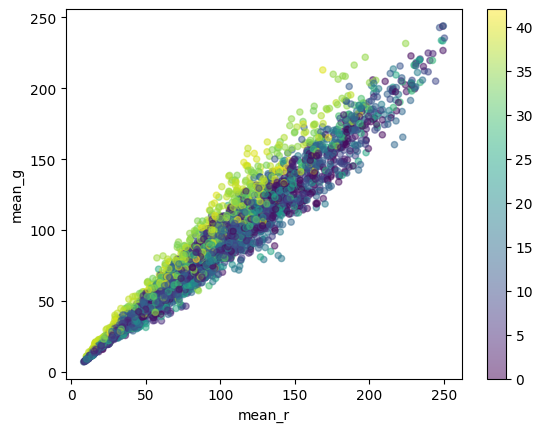

In [41]:
train_data.plot.scatter(
    x='mean_r',
    y='mean_g',
    c=y_train,
    cmap='viridis',
    alpha=0.5
)


### try some models

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(train_data, y_train)  # 使用默认参数训练
rf.score(train_data, y_train), rf.score(dev_data, y_dev)


(1.0, 0.7887067395264117)

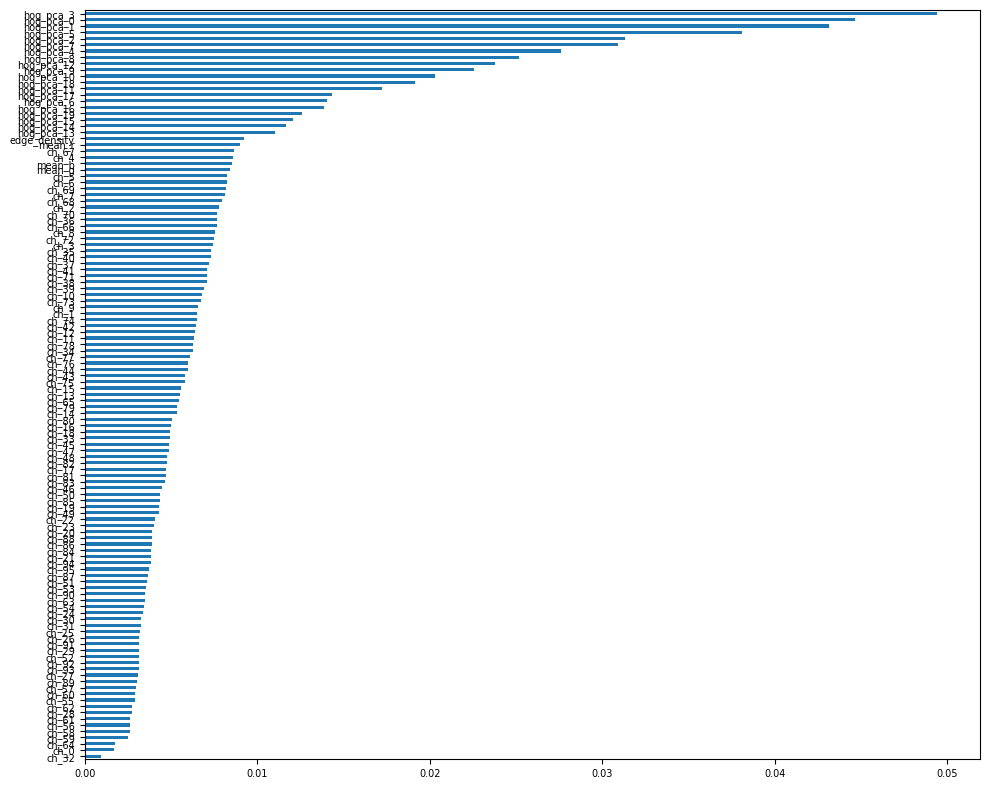

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 8))  # 放大画布
(
    pd.Series(rf.feature_importances_, index=train_data.columns)
    .sort_values()
    .plot.barh(fontsize=7)  # 设置字体大小
)
plt.tight_layout()
plt.show()


### Baseline：Random Forest

模型训练

In [44]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(train_data, y_train)

print("Train Accuracy:", rf.score(train_data, y_train))
print("Dev Accuracy:", rf.score(dev_data, y_dev))


Train Accuracy: 1.0
Dev Accuracy: 0.7905282331511839


分类报告 + F1 分数（按类）


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.72      0.88      0.79        58
           2       0.69      0.74      0.71        61
           3       0.71      0.68      0.69        37
           4       0.70      0.72      0.71        54
           5       0.69      0.69      0.69        52
           6       1.00      0.91      0.95        11
           7       0.83      0.71      0.77        42
           8       0.64      0.72      0.68        29
           9       0.73      0.80      0.77        41
          10       0.67      0.83      0.74        54
          11       0.53      0.70      0.60        37
          12       0.96      1.00      0.98        55
          13       1.00      1.00      1.00        60
          14       1.00      0.96      0.98        24
          15       1.00      0.50      0.67        18
          16       1.00      0.91      0.95        11
  

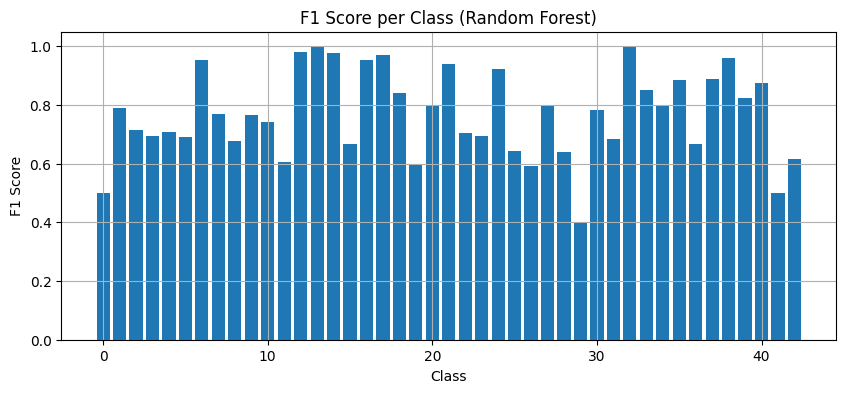

In [45]:
from sklearn.metrics import classification_report, f1_score

y_pred = rf.predict(dev_data)

print("\nClassification Report:\n")
print(classification_report(y_dev, y_pred))

# F1-score per class
f1_per_class = f1_score(y_dev, y_pred, average=None)
plt.figure(figsize=(10, 4))
plt.bar(np.sort(y_dev.unique()), f1_per_class)
plt.title("F1 Score per Class (Random Forest)")
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


In [46]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(train_data, y_train)

print("Train Accuracy:", rf.score(train_data, y_train))
print("Dev Accuracy:", rf.score(dev_data, y_dev))


Train Accuracy: 1.0
Dev Accuracy: 0.7905282331511839


特征重要性（排序+可视化）


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.72      0.88      0.79        58
           2       0.69      0.74      0.71        61
           3       0.71      0.68      0.69        37
           4       0.70      0.72      0.71        54
           5       0.69      0.69      0.69        52
           6       1.00      0.91      0.95        11
           7       0.83      0.71      0.77        42
           8       0.64      0.72      0.68        29
           9       0.73      0.80      0.77        41
          10       0.67      0.83      0.74        54
          11       0.53      0.70      0.60        37
          12       0.96      1.00      0.98        55
          13       1.00      1.00      1.00        60
          14       1.00      0.96      0.98        24
          15       1.00      0.50      0.67        18
          16       1.00      0.91      0.95        11
  

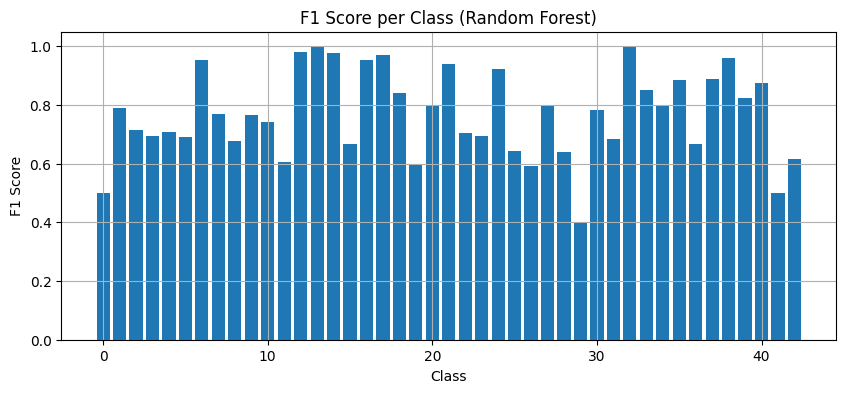

In [47]:
y_pred = rf.predict(dev_data)

print("\nClassification Report:\n")
print(classification_report(y_dev, y_pred))

# F1-score per class
f1_per_class = f1_score(y_dev, y_pred, average=None)
plt.figure(figsize=(10, 4))
plt.bar(np.sort(y_dev.unique()), f1_per_class)
plt.title("F1 Score per Class (Random Forest)")
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


错误分析（示例：分析真实为 4 的预测错样本）

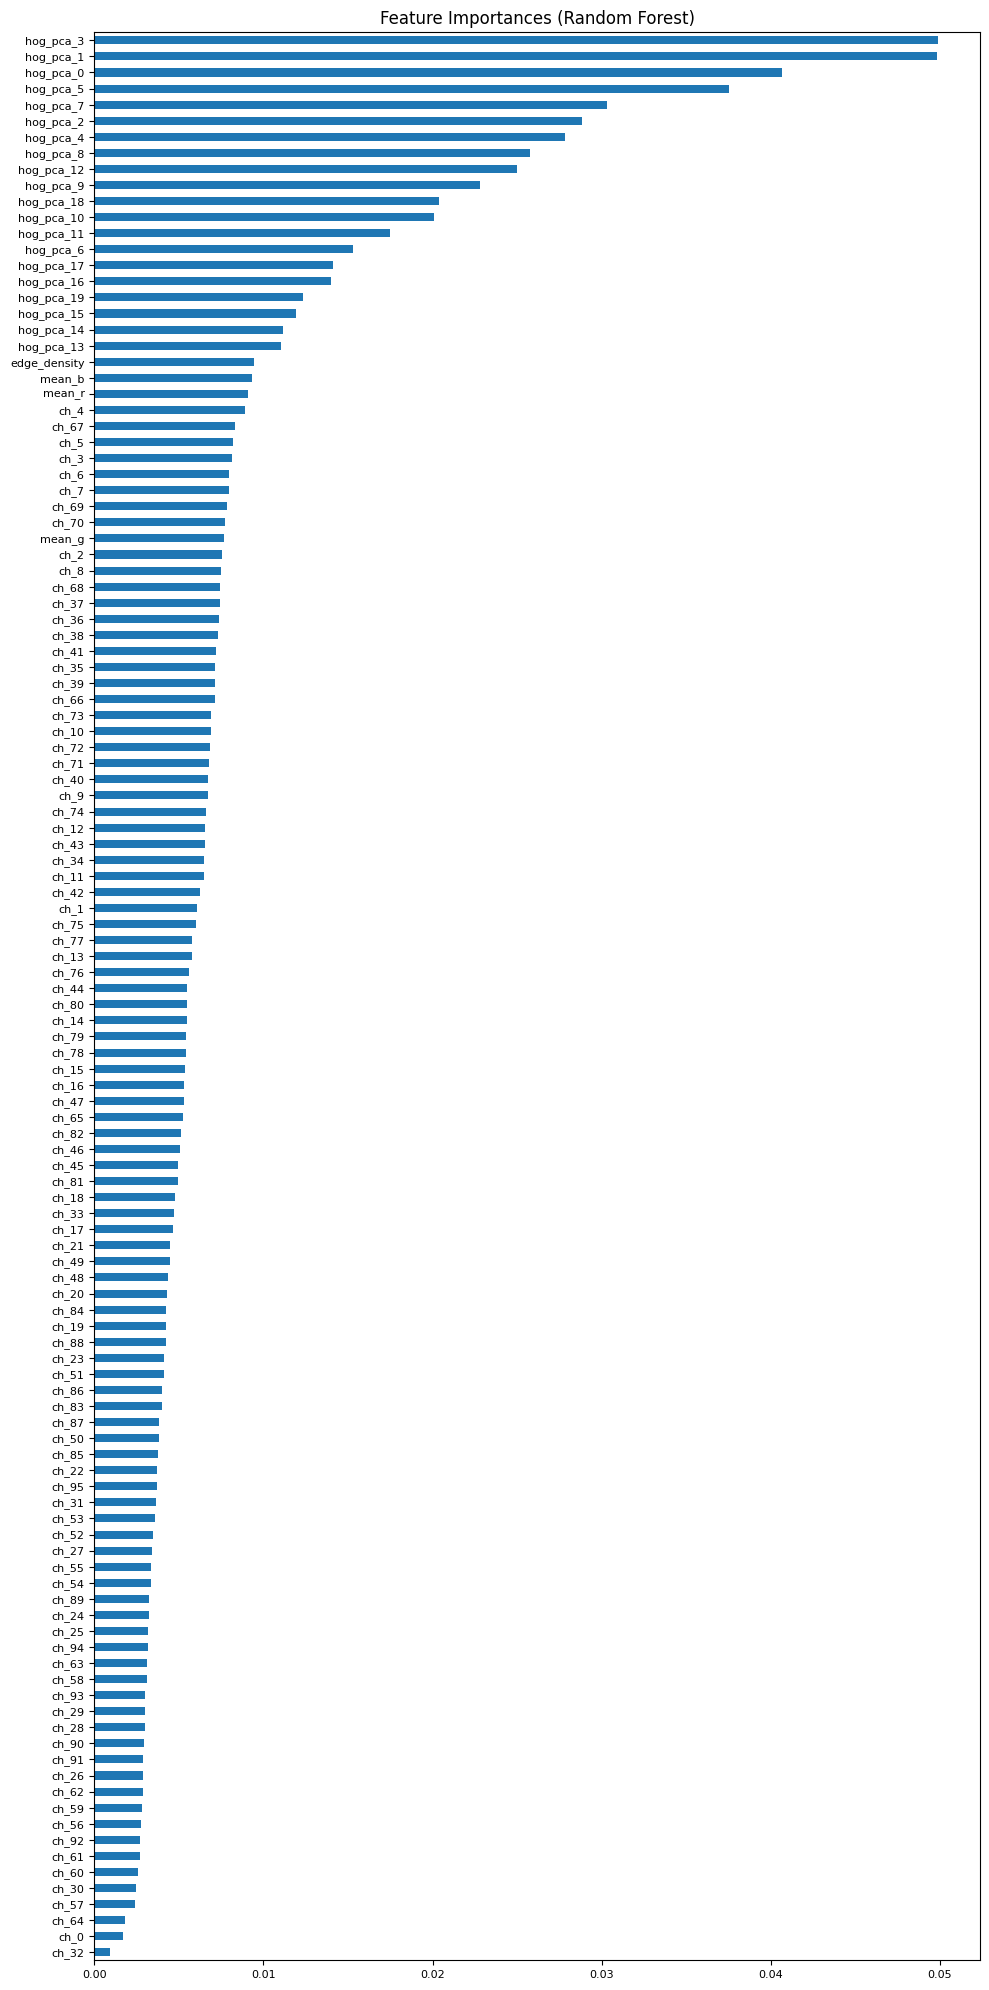

In [48]:
plt.figure(figsize=(10, 20))
pd.Series(rf.feature_importances_, index=train_data.columns)\
  .sort_values().plot.barh(fontsize=8)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


特征消融

In [49]:
rf_ablate = RandomForestClassifier(random_state=42)
rf_ablate.fit(train_data.drop(columns=['mean_r', 'mean_g', 'mean_b']), y_train)

print("Without RGB - Dev Accuracy:", rf_ablate.score(dev_data.drop(columns=['mean_r', 'mean_g', 'mean_b']), y_dev))


Without RGB - Dev Accuracy: 0.7905282331511839


合并数据集

In [50]:
# 加载测试集特征文件
hog_test = pd.read_csv('test/Features/hog_pca.csv')
ch_test = pd.read_csv('test/Features/color_histogram.csv')
additional_test = pd.read_csv('test/Features/additional_features.csv')


In [51]:
hog_test['image_id'] = hog_test['image_path'].str.slice(start=4, stop=10)
ch_test['image_id'] = ch_test['image_path'].str.slice(start=4, stop=10)
additional_test['image_id'] = additional_test['image_path'].str.slice(start=4, stop=10)


In [52]:
test_combined = hog_test.drop(columns=['image_path']) \
    .merge(ch_test.drop(columns=['image_path']), on='image_id') \
    .merge(additional_test.drop(columns=['image_path']), on='image_id') \
    .set_index('image_id').sort_index()


提交

In [53]:
# 强制 test_combined 使用训练时的列顺序
test_combined_aligned = test_combined[train_data.columns]


In [54]:
test_prediction_rf = rf.predict(test_combined_aligned)


In [55]:
test_metadata = pd.read_csv('test/test_metadata.csv')


In [56]:
submission_rf = pd.DataFrame({
    'id': test_metadata['id'],  # 正确顺序的 id
    'ClassId': test_prediction_rf
})
submission_rf.to_csv('submission_rf.csv', index=False)


### knn

In [73]:
from sklearn.neighbors import KNeighborsClassifier


In [74]:
knn = KNeighborsClassifier(n_neighbors=3)  # 可以调节 k 值，如 3、5、7
knn.fit(train_data, y_train)


KNeighborsClassifier(n_neighbors=3)

In [75]:
print("Train Accuracy:", knn.score(train_data, y_train))
print("Dev Accuracy:", knn.score(dev_data, y_dev))


Train Accuracy: 0.6580865603644647
Dev Accuracy: 0.3761384335154827


In [76]:
test_combined_aligned = test_combined[train_data.columns]

test_prediction_knn = knn.predict(test_combined_aligned)

submission_knn = pd.DataFrame({
    'id': test_metadata['id'],
    'ClassId': test_prediction_knn
})


submission_knn.to_csv('submission_knn.csv', index=False)


### mlp

标准化

In [ ]:
# 加载测试特征并提取 image_id（路径请根据你的结构修改）
hog_test = pd.read_csv("test/Features/hog_pca.csv")
ch_test = pd.read_csv("test/Features/color_histogram.csv")
additional_test = pd.read_csv("test/Features/additional_features.csv")

# 提取 image_id
for df in [hog_test, ch_test, additional_test]:
    df["image_id"] = df["image_path"].str.slice(start=4, stop=10)

# 合并测试特征
test_combined = hog_test.drop(columns=["image_path"]) \
    .merge(ch_test.drop(columns=["image_path"]), on="image_id") \
    .merge(additional_test.drop(columns=["image_path"]), on="image_id") \
    .set_index("image_id").sort_index()


In [ ]:
test_scaled = scaler.transform(test_combined[train_data.columns])


In [ ]:
test_prediction_mlp = mlp.predict(test_scaled)


In [ ]:

test_metadata = pd.read_csv("test/test_metadata.csv")

submission_mlp = pd.DataFrame({
    "id": test_metadata["id"],
    "ClassId": test_prediction_mlp
})

submission_mlp.to_csv("submission_mlp.csv", index=False)


In [ ]:
train_acc = mlp.score(train_scaled, y_train)
dev_acc = mlp.score(dev_scaled, y_dev)

print("Train Accuracy:", train_acc)
print("Dev Accuracy:", dev_acc)


Train Accuracy: 1.0
Dev Accuracy: 0.8378870673952641


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_dev, mlp.predict(dev_scaled)))


              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.75      0.76      0.75        58
           2       0.71      0.77      0.74        61
           3       0.72      0.78      0.75        37
           4       0.77      0.85      0.81        54
           5       0.70      0.62      0.65        52
           6       0.92      1.00      0.96        11
           7       0.91      0.74      0.82        42
           8       0.69      0.83      0.75        29
           9       0.93      1.00      0.96        41
          10       0.86      0.89      0.87        54
          11       0.68      0.73      0.70        37
          12       0.98      0.95      0.96        55
          13       1.00      1.00      1.00        60
          14       0.92      0.96      0.94        24
          15       0.79      0.61      0.69        18
          16       0.91      0.91      0.91        11
          17       0.97    

In [ ]:
preds = mlp.predict(dev_scaled)
misclassified = y_dev[y_dev != preds]
misclassified


image_id
000045     1
000081     0
000204     5
000222    15
000239     5
          ..
005361    12
005376     5
005387     7
005441     7
005483     4
Name: ClassId, Length: 178, dtype: int64

### svm

In [ ]:
# 合并训练特征
train_data = train_idx.to_frame().merge(train_additional, on='image_id') \
                              .merge(train_ch, on='image_id') \
                              .merge(train_hog, on='image_id') \
                              .set_index('image_id').sort_index()

# 合并验证特征
dev_data = dev_idx.to_frame().merge(dev_additional, on='image_id') \
                            .merge(dev_ch, on='image_id') \
                            .merge(dev_hog, on='image_id') \
                            .set_index('image_id').sort_index()


In [ ]:
y_train = train_label.set_axis(train_idx).sort_index()
y_dev = dev_label.set_axis(dev_idx).sort_index()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)
dev_scaled = scaler.transform(dev_data)


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)
svm.fit(train_scaled, y_train)


SVC(class_weight='balanced', random_state=42)

In [ ]:
print("Train Accuracy:", svm.score(train_scaled, y_train))
print("Dev Accuracy:", svm.score(dev_scaled, y_dev))


Train Accuracy: 0.8660592255125285
Dev Accuracy: 0.7586520947176685


In [ ]:
# 合并测试特征（与训练一致）
test_combined = hog_test.drop(columns=['image_path']) \
    .merge(ch_test.drop(columns=['image_path']), on='image_id') \
    .merge(additional_test.drop(columns=['image_path']), on='image_id') \
    .set_index('image_id').sort_index()

# 标准化测试特征
test_scaled = scaler.transform(test_combined[train_data.columns])

# 预测
test_prediction_svm = svm.predict(test_scaled)


In [ ]:
submission_svm = pd.DataFrame({
    'id': test_metadata['id'],  # id 列来源于 test/test_metadata.csv
    'ClassId': test_prediction_svm
})
submission_svm.to_csv('submission_svm.csv', index=False)
